#  Summary of the code

•	Import data created with "Data_processing" code.

•	Define the sets of data to be used in the model

•	Split data into training and testing sets

•	Scale predicting variables

•	Perform a Grid-Search Cross Validation

•	Test model 


# Import relevant packages

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import datasets

In [32]:
infile_matchMTMthro='anomalyNOxmatchingdays.csv'
matchMTMthro=pd.read_csv(infile_matchMTMthro)
# matchMTMthro.head()
matchMTMthro

,month,day,year,nitra,anomNOx,rain,tworain,threerain,fiverain,windspeed,...,Condct,WatTemp,twoWatTemp,threeWatTemp,fiveWatTemp,aboveMLLW,MLLW,twoMLLW,threeMLLW,fiveMLLW
0,1,31,2000,0.0350,NaN,0.00,1.07,1.07,1.07,8.95,...,NaN,1.800000,2.900000,4.400000,9.300000,NaN,2.16,3.26,4.91,10.26
1,2,24,2000,0.0060,-0.029,0.00,0.00,0.00,0.02,9.40,...,NaN,7.300000,13.100000,19.400000,31.600000,NaN,2.11,4.49,7.20,12.83
2,3,23,2000,0.0420,0.036,0.00,0.67,0.81,0.81,10.07,...,NaN,12.150000,21.400000,32.500000,56.100000,NaN,4.25,8.35,12.07,18.45
3,5,25,2000,0.0040,NaN,0.10,0.00,0.68,1.11,7.83,...,NaN,22.300000,42.200000,64.275000,106.675000,NaN,2.79,6.02,9.24,15.48
4,6,22,2000,0.0040,0.000,0.02,0.01,0.81,1.12,12.30,...,NaN,25.500000,50.300000,76.100000,127.500000,NaN,2.12,5.25,7.61,12.64
5,7,20,2000,0.0040,0.000,0.21,0.99,0.99,2.43,7.38,...,NaN,26.600000,53.900000,80.000000,133.175000,NaN,2.98,5.85,9.04,15.30
6,8,23,2000,0.0080,0.004,0.00,0.00,0.00,0.75,7.38,...,NaN,24.900000,50.300000,75.500000,126.700000,NaN,2.56,5.60,8.65,14.60
7,9,21,2000,0.0480,0.040,0.00,0.00,0.23,0.23,8.95,...,NaN,23.200000,46.100000,69.500000,118.300000,NaN,2.44,4.77,7.30,14.08
8,10,26,2000,0.0050,-0.043,0.00,0.00,0.00,0.00,8.50,...,NaN,NaN,NaN,NaN,NaN,NaN,3.04,5.93,8.98,14.52
9,11,27,2000,0.0170,0.012,0.00,0.73,0.73,0.73,7.83,...,NaN,NaN,NaN,NaN,NaN,NaN,2.71,6.50,9.01,12.74


# Define the sets of data to be used in the model

In [33]:
matchMTMthro_filt=matchMTMthro[(matchMTMthro.MLLW>2.99)&(matchMTMthro.WatTemp>0)&(matchMTMthro.anomNOx>0)]
matchMTMthro_filt

,month,day,year,nitra,anomNOx,rain,tworain,threerain,fiverain,windspeed,...,Condct,WatTemp,twoWatTemp,threeWatTemp,fiveWatTemp,aboveMLLW,MLLW,twoMLLW,threeMLLW,fiveMLLW
2,3,23,2000,0.042,0.0360,0.00,0.67,0.81,0.81,10.07,...,NaN,12.150000,21.400000,32.500000,56.100000,NaN,4.25,8.35,12.07,18.45
14,4,26,2001,0.078,0.0690,0.00,0.64,0.64,0.64,18.12,...,NaN,15.200000,32.900000,48.500000,77.400000,NaN,3.12,5.02,6.91,10.92
18,9,20,2001,0.108,0.0790,0.56,-0.00,-0.00,0.00,6.93,...,NaN,23.625000,46.050000,68.850000,117.450000,NaN,3.44,7.16,11.51,20.10
35,5,29,2003,0.090,0.0860,0.28,0.12,0.19,0.20,6.93,...,NaN,20.000000,39.200000,58.700000,97.600000,NaN,3.11,6.58,9.82,15.92
39,9,25,2003,0.043,0.0320,0.00,0.56,0.56,0.56,5.14,...,NaN,24.600000,48.200000,72.400000,119.500000,NaN,3.47,6.88,10.19,16.41
40,10,23,2003,0.101,0.0580,0.00,0.00,0.00,0.02,9.40,...,NaN,18.500000,37.100000,55.700000,94.300000,NaN,3.45,5.39,8.18,14.11
41,11,20,2003,0.193,0.0920,0.17,1.51,1.51,1.51,7.83,...,NaN,14.600000,28.700000,42.600000,71.700000,NaN,3.19,5.97,8.52,11.60
51,9,23,2004,0.189,0.0630,0.00,-0.00,0.00,0.26,7.16,...,18.24,22.000000,44.200000,67.200000,116.700000,NaN,3.31,6.70,10.98,19.13
58,5,24,2005,0.069,0.0620,0.20,0.38,0.38,0.52,10.51,...,24.12,18.500000,37.900000,56.200000,93.300000,NaN,4.23,7.50,11.44,18.25
61,8,16,2005,0.010,0.0060,0.45,-0.00,0.00,1.61,6.71,...,30.21,28.200000,57.600000,85.800000,142.200000,NaN,3.67,5.62,8.26,13.82


In [34]:
matchMTMthro_filt.columns

Index(['month', 'day', 'year', 'nitra', 'anomNOx', 'rain', 'tworain',
       'threerain', 'fiverain', 'windspeed', 'winddir', 'Condct', 'WatTemp',
       'twoWatTemp', 'threeWatTemp', 'fiveWatTemp', 'aboveMLLW', 'MLLW',
       'twoMLLW', 'threeMLLW', 'fiveMLLW'],
      dtype='object')

In [52]:
X=matchMTMthro_filt[['fiveWatTemp','threerain','winddir']]

y=matchMTMthro_filt[["nitra"]]

# Training and Testing data

In [53]:
# Split the data into training/testing sets
# 1) import the fuction
from sklearn.model_selection import train_test_split

In [54]:
# 2) use the fuction 'train_test_split' to define the train and test datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4)

In [55]:
# print(np.shape(X_train))
# print(np.shape(X_test))

In [56]:
# print(np.shape(y_train))
# print(np.shape(y_test))

# Scaling

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# GridSearch Cross Validation

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# create model object
model = RandomForestRegressor()

# define type of cross validation to be used
cv = KFold(n_splits = 10, shuffle = True)

# set-up hyperparameter grid
treecount = np.arange(2,40,1) # number of decisions trees in the ensemble
maxdepth = np.arange(2,40,1) # longest path between root node and final node

param_grid = {'n_estimators':treecount, 'max_depth':maxdepth}

# define scoring parameters to evaluate the predictions on the test set
scoring = 'r2'

# create GridSearchCV object
grid_cv = GridSearchCV(model, param_grid, scoring = scoring, cv = cv, refit = True) # when refit = True, will refit the best
# estimator with the entire dataset

# fit model to the train/test data
grid_cv.fit(X_train_s,np.ravel(y_train, order = 'C'))

mean_test_score = grid_cv.cv_results_['mean_test_score']
std_test_score = grid_cv.cv_results_['std_test_score']
best_std_test_score = grid_cv.cv_results_['std_test_score'][mean_test_score ==  grid_cv.best_score_]

print("Tuned Parameter(s): {}".format(grid_cv.best_params_))
print("Best score is: %f +/- %f" % (grid_cv.best_score_,best_std_test_score)) # mean cross-validated score of the best estimator

Tuned Parameter(s): {'max_depth': 19, 'n_estimators': 7}
Best score is: -200.744738 +/- 414.829698


C:\Users\a_mac\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Test the model

    Training data

In [60]:
grid_cv.score(X_train_s,y_train)

0.7279837179827223

In [61]:
# compute the R^2 score
print("Training R^2 score: {0:.3f}".format(grid_cv.score(X_train_s,y_train)))

Training R^2 score: 0.728


In [62]:
# plot the model together with the data
xfit = X_test_s
yfit = grid_cv.predict(xfit)

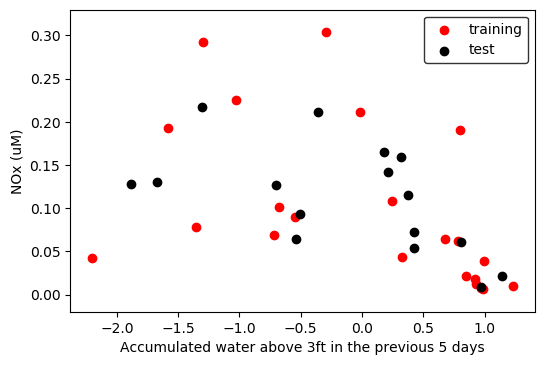

In [63]:
# plot training and testing data

fig, (ax) =  plt.subplots(1, 1, dpi = 100)
# plt.scatter(X_train[["fiveMLLW"]],y_train,c='r')
plt.scatter(X_train_s[:,0],y_train,c='r')
# plt.scatter(X_test[["fiveMLLW"]], yfit,c = 'k')
plt.scatter(xfit[:,0],yfit,c='k')
plt.xlabel('Accumulated water above 3ft in the previous 5 days')
plt.ylabel('NOx (uM)')
ax.legend(('training', 'test'), edgecolor = 'k', loc = 'best')

    Testing data

In [64]:
from scipy import stats

In [65]:
#creating OLS regression
slope, intercept, r_value, p_value, std_err = stats.linregress(yfit,np.asanyarray(y_test.nitra))
def linefitline(b):
    return intercept + slope * b
line1 = linefitline(yfit)

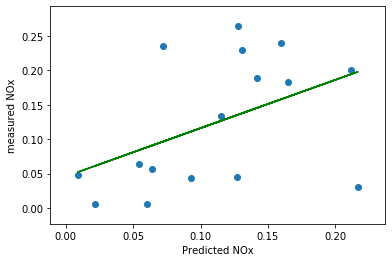

0.45614518674726096


In [66]:
#plot line
plt.scatter(yfit,np.asanyarray(y_test.nitra))
plt.ylabel('measured NOx')
plt.xlabel('Predicted NOx')
plt.plot(yfit,line1, c = 'g')
plt.show()
print(r_value)